In [1]:
git_repo = '../../..'

import sys
import os

sys.path.insert(0, os.path.join(git_repo, 'BNP_sensitivity/GMM_clustering/'))

# Linear response libraries
import LinearResponseVariationalBayes as vb
import LinearResponseVariationalBayes.SparseObjectives as obj_lib

# Local libraries
import gmm_clustering_lib as gmm_utils
import modeling_lib 
import functional_sensitivity_lib as fun_sens_lib 
import utils_lib

import matplotlib.pyplot as plt
%matplotlib inline

from copy import deepcopy

import numpy as np
import scipy as sp

np.random.seed(453453)

import json 

In [15]:
# Load results from previous fit.
base_filename = 'ryan_iris_bnp_full_data_fit_alpha8.0.json'
json_input_file = os.path.join(
    git_repo, 'BNP_sensitivity/GMM_clustering/iris_fits/', base_filename)

with open(json_input_file, 'r') as fp:
    fit_dict = json.load(fp)
    model = gmm_utils.get_model_from_checkpoint(fit_dict)
    model_ = gmm_utils.get_model_from_checkpoint(fit_dict)
    best_param = model.global_vb_params.get_free()
    kl_hessian = gmm_utils.get_kl_hessian_from_checkpoint(fit_dict)

In [3]:
moment_model = gmm_utils.InterestingMoments(model)
dg_deta = moment_model.get_moment_jacobian(best_param)
linear_sens = gmm_utils.LinearSensitivity(model, moment_model, kl_hessian)

Prior Hessian...
Data Hessian...
Linear systems...
Done.


In [4]:
model_refit = deepcopy(model)
print(model.prior_params)

prior_params:
	alpha: [8.]
	prior_centroid_mean: [0.]
	prior_centroid_info: [0.1]
	prior_gamma_df: [8.]
	prior_gamma_inv_scale:
[[0.62 0.   0.   0.  ]
 [0.   0.62 0.   0.  ]
 [0.   0.   0.62 0.  ]
 [0.   0.   0.   0.62]]


In [5]:
def refit_with_alpha(new_alpha, model, linear_sens):
    model_refit = deepcopy(model)
    model_refit.prior_params['alpha'].set(new_alpha)
    free_par_refit = linear_sens.predict_from_prior_params(
        model_refit.prior_params.get_free())
    model_refit.optimize_full(free_par_refit,
        init_max_iter=100,
        final_max_iter=500)
    return free_par_refit, model_refit.global_vb_params.get_free()


In [6]:
alpha_vec = np.linspace(1, 14, num=14)
print(alpha_vec)
free_par_refit_list = []
free_par_refit_lr_list = []
for alpha in alpha_vec:
    print('\n\nalpha: ', alpha)
    free_par_refit, free_par_refit_lr = refit_with_alpha(alpha, model, linear_sens)
    free_par_refit_list.append(free_par_refit)
    free_par_refit_lr_list.append(free_par_refit_lr)
        

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


alpha:  1.0
BGFS
Iter: 0	 RMSE: 11.339413186360114	 Objective: -318.23613242970606
Iter: 10	 RMSE: 11.337337615226355	 Objective: -318.267854925061
Iter: 20	 RMSE: 11.337511705761491	 Objective: -318.2679244896362
Iter: 30	 RMSE: 11.337511705790947	 Objective: -318.2679244896393
Iter: 40	 RMSE: 11.336635583031917	 Objective: -318.2665290047097
Iter: 50	 RMSE: 11.33744758173699	 Objective: -318.267910842387
         Current function value: -318.267049
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 40
Conditioned Newton:
i =  0
Iter: 60	 RMSE: 11.337181600951627	 Objective: -318.2737157621924
Iter: 70	 RMSE: 11.337180550908906	 Objective: -318.27372215409844
         Current function value: -318.273722
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 16
         Hessian evaluations: 0
Iter 1: x_diff = 0.12273478440720355, f_diff = 0.0066728488823173

Iter: 30	 RMSE: 11.287265481149351	 Objective: -308.8752646969467
Iter: 40	 RMSE: 11.287265481148799	 Objective: -308.87526469694683
Iter: 50	 RMSE: 11.287173570445955	 Objective: -308.87525812789727
Iter: 60	 RMSE: 11.287261923773844	 Objective: -308.8752646858637
         Current function value: -308.875257
         Iterations: 1
         Function evaluations: 62
         Gradient evaluations: 51
Conditioned Newton:
i =  0
Iter: 70	 RMSE: 11.287365473965666	 Objective: -308.87525774639084
Iter: 80	 RMSE: 11.287367993499625	 Objective: -308.8752565906331
         Current function value: -308.875257
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 4
         Hessian evaluations: 0
Iter 1: x_diff = 2.0879585820726687e-11, f_diff = 1.1937117960769683e-12


alpha:  7.0
BGFS
Iter: 0	 RMSE: 11.272653011617187	 Objective: -307.0883077411757
Iter: 10	 RMSE: 11.27264808570628	 Objective: -307.0883077780419
Iter: 20	 RMSE: 11.272648138038344	 Objective: -

Iter: 130	 RMSE: 11.193552768983094	 Objective: -297.403355927812
Iter: 140	 RMSE: 11.193540329097841	 Objective: -297.4034256883715
Iter: 150	 RMSE: 11.193540329086055	 Objective: -297.4034256884383
         Current function value: -297.403426
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 8
         Hessian evaluations: 0
Iter 1: x_diff = 2.8752171650492375e-11, f_diff = 1.9326762412674725e-12


alpha:  14.0
BGFS
Iter: 0	 RMSE: 11.172851707487283	 Objective: -295.6771177418732
Iter: 10	 RMSE: 11.181324588307668	 Objective: -295.75775681535737
Iter: 20	 RMSE: 11.17675055184041	 Objective: -295.80713400508375
Iter: 30	 RMSE: 11.179847856591444	 Objective: -295.9043087615198
Iter: 40	 RMSE: 11.17984785686515	 Objective: -295.9043087614395
Iter: 50	 RMSE: 11.179847856591445	 Objective: -295.904308761519
Iter: 60	 RMSE: 11.179881130015936	 Objective: -295.9042947194008
         Current function value: -295.904004
         Iterations: 19
         F

In [8]:
# fit_dict = gmm_utils.get_checkpoint_dictionary(model, kl_hessian, seed=453453)
# base_alpha = model.prior_params['alpha'].get()
# filename = 'ryan_iris_bnp_full_data_fit_alpha{}.json'.format(base_alpha)
# json_output_file = os.path.join(
#     git_repo,
#     'BNP_sensitivity/GMM_clustering/iris_fits/',
#     filename)
# print('saving fit dict to ', json_output_file)
# with open(json_output_file, 'w') as outfile:
#     json.dump(fit_dict, outfile)


15.843407204965061


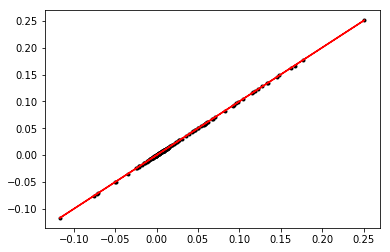

In [7]:
i = 5
print(np.linalg.norm(free_par_refit_list[i]))
plt.plot(free_par_refit_list[i] - best_param, free_par_refit_lr_list[i] - best_param, 'k.')
plt.plot(free_par_refit_list[i] - best_param, free_par_refit_list[i] - best_param, 'r')

In [23]:
import json
import json_tricks
import checkpoints
import re

np_string = checkpoints.np_string
fit_dict = {}
fit_dict['free_par_refit_list' + np_string] = json_tricks.dumps(free_par_refit_list)
fit_dict['free_par_refit_lr_list' + np_string] = json_tricks.dumps(free_par_refit_lr_list)
fit_dict['alpha_vec' + np_string] = json_tricks.dumps(alpha_vec)
fit_dict['json_input_file'] = json_input_file

output_filename = re.sub('\.json$', '', base_filename) + '_alpha_refit.json'
json_output_file = os.path.join(
    git_repo, 'BNP_sensitivity/GMM_clustering/iris_fits/',
    output_filename)
print(json_output_file)
print('saving fit dict to ', json_output_file)
with open(json_output_file, 'w') as outfile:
    json.dump(fit_dict, outfile)


../../../BNP_sensitivity/GMM_clustering/iris_fits/ryan_iris_bnp_full_data_fit_alpha8.0_alpha_refit.json
saving fit dict to  ../../../BNP_sensitivity/GMM_clustering/iris_fits/ryan_iris_bnp_full_data_fit_alpha8.0_alpha_refit.json
